# Tasic B. et al. 2018 Mouse neocortical areas

## Reference:    
[Tasic B. et al. Shared and distinct transcriptomic cell types across neocortical areas. Naturevolume 563, pages72–78 (2018)](https://www.nature.com/articles/s41586-018-0654-5#Abs1)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE115746

# Top

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


# Download

In [2]:
phn1 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_accession_table.csv.gz",\
                index_col=0, sep='\t')
phn2 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_complete_metadata_28706-cells.csv.gz",\
                index_col=0)

> According to the paper, only consider exons.

In [ ]:
cts1 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_cells_exon_counts.csv.gz",\
                index_col=0)
cts2 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_controls_exon_counts.csv.gz",\
                index_col=0)

In [ ]:
cts = pd.concat([cts1,cts2],axis=1)

In [ ]:
cts.shape

In [ ]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.T.values))
ad.obs_names = cts.columns
ad.var_names = cts.index

ad = ad[ad.obs_names.isin(phn2.index),:]
phn = phn2.loc[ad.obs_names]
ad.obs['x'] =''
ad.obs = phn

In [ ]:
ad

In [5]:
ad.raw = sc.pp.log1p(ad, copy=True)

In [ ]:
ad.obs['cell'] = ad.obs['cell_subclass']

In [6]:
ad.write("../write/Tasic2018Cortex.h5")

In [ ]:
cts1 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_cells_intron_counts.csv.gz",\
                index_col=0)
cts2 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_controls_intron_counts.csv.gz",\
                index_col=0)
cts = pd.concat([cts1,cts2],axis=1)

In [ ]:
cts.shape

In [ ]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.T.values))
ad.obs_names = cts.columns
ad.var_names = cts.index

In [ ]:
ad.write("../write/Tasic2018Cortex_intron.h5")

# Analysis

In [4]:
ad = sc.read("../write/Tasic2018Cortex.h5")

In [5]:
ad = ad[ad.obs['sequencing_qc_pass_fail']=='Pass',:]
ad = ad[~ad.obs['cell_class'].isin(['Low Quality','No Class'])]
ad = ad[~ad.obs['cell_class'].isin(['ERCC','ControlTotalRNA','MouseWholeRNA'])]
ad = ad[~ad.obs['cell_subclass'].isin(['nan'])]

In [6]:
sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_cells(ad, min_counts=200)
sc.pp.filter_genes(ad, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


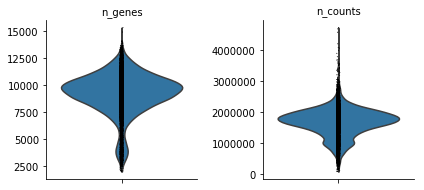

In [7]:
sc.pl.violin(ad, ['n_genes', 'n_counts'],
             jitter=0.01, multi_panel=True, cut=0)

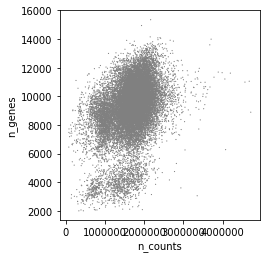

In [8]:
figsize(4,4)
sc.pl.scatter(ad, x='n_counts', y='n_genes')

In [9]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e4)
sc.pp.log1p(ad)

In [10]:
# sc.pp.highly_variable_genes(ad, min_mean=0.0125, max_mean=10, min_disp=0.5)
# sc.pl.highly_variable_genes(ad)

In [11]:
sc.tl.pca(ad, svd_solver='arpack')
sc.pp.neighbors(ad)
sc.tl.umap(ad)

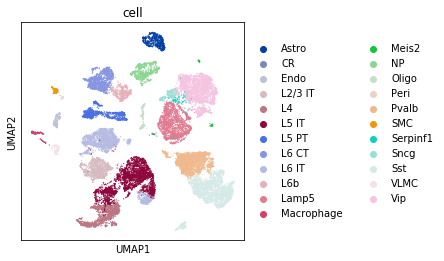

In [12]:
sc.pl.umap(ad, color=['cell'])

In [13]:
ad.write('../write/Tasic2018Cortex_reg.h5')

In [2]:
sc.__version__

'1.4.4.post1'

In [ ]:
sc.tl.tsne(ad)

In [ ]:
ad.uns['cell_colors'] = color_long

In [ ]:
sc.pl.tsne(ad, color=['cell_class','cell'])

In [ ]:
ad.write('../write/Tasic2018Cortex_reg.h5')

# End